In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  

# Load ResNet-50 and modify the backbone (remove the fully connected and avgpool layers)
resnet50_backbone = models.resnet50(pretrained=True)
resnet50_backbone = nn.Sequential(*list(resnet50_backbone.children())[:-2])  # Remove fully connected layer and avgpool

# Now, replace the backbone of YOLOv8 with ResNet-50
model.model.backbone = resnet50_backbone


model.model.nc = 6  # Set number of classes (for acne detection)

# If there is a class_names attribute, update it as well
model.model.names = ['blackheads', 'dark_spots', 'nodules', 'papules', 'pustules', 'whiteheads']

# Set the device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Train the model
model.train(
    data=r'C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\data.yaml',  # Path to the dataset configuration file
    epochs=50,  # Number of training epochs
    imgsz=640,  # Image size
    batch=8,  # Batch size
    workers=4,  # Number of data loader workers
    save=True,  # Save training results
    device=device  # Pass the device (GPU or CPU)
)


d:\Anaconda\envs\acne_gpu\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anaconda\envs\acne_gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Ultralytics 8.3.69  Python-3.11.9 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\train\labels.cache... 640 images, 0 backgrounds, 0 corrupt: 100%|██████████| 640/640 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\valid\labels.cache... 197 images, 3 backgrounds, 0 corrupt: 100%|██████████| 197/197 [00:00<?, ?it/s]


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.37G      2.818      5.033      1.572        141        640: 100%|██████████| 80/80 [00:24<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]

                   all        197       1097     0.0688      0.144     0.0445     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.32G      2.388      2.778      1.345        120        640: 100%|██████████| 80/80 [00:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]

                   all        197       1097      0.166      0.135     0.0346     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.54G      2.343      2.714      1.354        118        640: 100%|██████████| 80/80 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]

                   all        197       1097      0.243      0.178     0.0681     0.0238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.16G      2.349      2.652      1.317         89        640: 100%|██████████| 80/80 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]

                   all        197       1097      0.664      0.112     0.0773     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      2.306      2.506      1.353         94        640: 100%|██████████| 80/80 [00:32<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]


                   all        197       1097      0.118      0.177     0.0963     0.0344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.59G      2.331       2.49      1.332         84        640: 100%|██████████| 80/80 [00:36<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]

                   all        197       1097      0.586      0.144     0.0787     0.0269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.09G      2.254      2.458      1.317         95        640: 100%|██████████| 80/80 [00:53<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]

                   all        197       1097      0.289       0.17        0.1     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.44G      2.281      2.373      1.328         51        640: 100%|██████████| 80/80 [01:08<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]

                   all        197       1097      0.132      0.193      0.102     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.24G      2.238      2.336      1.301         75        640: 100%|██████████| 80/80 [00:58<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]


                   all        197       1097      0.128      0.222      0.114     0.0414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G      2.245      2.351      1.301        127        640: 100%|██████████| 80/80 [00:28<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]

                   all        197       1097      0.438      0.145        0.1     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.19G      2.257      2.272      1.277         80        640: 100%|██████████| 80/80 [00:27<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        197       1097      0.177      0.203      0.116     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.11G      2.217      2.257      1.268         78        640: 100%|██████████| 80/80 [00:26<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]


                   all        197       1097      0.177      0.179      0.108     0.0382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.21G      2.236      2.253        1.3         83        640: 100%|██████████| 80/80 [00:26<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]


                   all        197       1097      0.331      0.209      0.125     0.0465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.15G       2.19      2.248      1.288         98        640: 100%|██████████| 80/80 [00:25<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]


                   all        197       1097      0.146      0.218      0.117     0.0411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.43G      2.206       2.19      1.282         80        640: 100%|██████████| 80/80 [00:26<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        197       1097      0.153      0.246      0.121     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.23G      2.189      2.195      1.275         61        640: 100%|██████████| 80/80 [00:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]

                   all        197       1097      0.154      0.257      0.139     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.43G       2.19      2.194      1.284         70        640: 100%|██████████| 80/80 [00:26<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]

                   all        197       1097      0.155      0.241      0.134     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.29G      2.181      2.157      1.284         69        640: 100%|██████████| 80/80 [00:26<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]

                   all        197       1097      0.156      0.227      0.121     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.18G      2.182      2.135      1.272         72        640: 100%|██████████| 80/80 [00:26<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        197       1097       0.15      0.228      0.125      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.2G      2.148      2.153      1.265        101        640: 100%|██████████| 80/80 [00:26<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]

                   all        197       1097      0.181      0.237       0.13      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.31G      2.175      2.115      1.284         49        640: 100%|██████████| 80/80 [00:26<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        197       1097      0.184       0.25      0.144     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.29G      2.142      2.078      1.248         64        640: 100%|██████████| 80/80 [00:26<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        197       1097      0.177      0.262      0.138     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.17G      2.158      2.056      1.254        112        640: 100%|██████████| 80/80 [00:26<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]


                   all        197       1097      0.181      0.224      0.142     0.0498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.29G      2.145      2.023      1.229        109        640: 100%|██████████| 80/80 [00:30<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        197       1097      0.196      0.243      0.134     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.08G      2.106       2.02      1.261        102        640: 100%|██████████| 80/80 [00:31<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        197       1097      0.184      0.296      0.152     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G      2.117      1.999      1.245         42        640: 100%|██████████| 80/80 [00:33<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]

                   all        197       1097      0.186      0.237      0.138     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.25G      2.098      1.941      1.245         57        640: 100%|██████████| 80/80 [00:39<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.72it/s]

                   all        197       1097      0.173      0.234      0.133     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.24G      2.128      2.051      1.233         66        640: 100%|██████████| 80/80 [00:43<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]


                   all        197       1097      0.183      0.232      0.135     0.0465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.29G      2.099      1.959      1.241         96        640: 100%|██████████| 80/80 [01:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all        197       1097      0.186      0.212      0.151     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.24G      2.103      1.952      1.238         81        640: 100%|██████████| 80/80 [01:14<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        197       1097      0.173      0.249      0.155     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.34G      2.114      1.927      1.242        102        640: 100%|██████████| 80/80 [01:14<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all        197       1097      0.202      0.251      0.143     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.62G      2.055      1.895      1.221         88        640: 100%|██████████| 80/80 [01:08<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]

                   all        197       1097      0.198      0.285      0.163     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.29G      2.075      1.898       1.23         73        640: 100%|██████████| 80/80 [01:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all        197       1097      0.205      0.277      0.145     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.11G      2.131      1.929      1.244         57        640:  10%|█         | 8/80 [00:07<01:09,  1.03it/s]

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from ultralytics import YOLO
def draw_predictions(model, image_path):
    """
    Runs object detection on an image and draws bounding boxes with class labels and confidence scores.

    Args:
        model: Trained object detection model (e.g., YOLO).
        image_path (str): Path to the input image.

    Returns:
        Displays the image with bounding boxes and labels.
    """
    # Run model prediction
    results = model.predict(image_path)

    # Load the original image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image. Check the file path.")
        return

    # Convert BGR to RGB (for Matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for result in results:
        # Get the original shape used by the model
        orig_h, orig_w = result.orig_shape  # Model input shape (e.g., 512x640)
        img_h, img_w, _ = image.shape       # Actual loaded image shape

        print(f"Model Input Shape: {orig_w}x{orig_h}")
        print(f"Displayed Image Shape: {img_w}x{img_h}")

        if len(result.boxes) > 0:
            for box in result.boxes:
                x1, y1, x2, y2 = box.xyxy[0].tolist()  # Get bounding box coordinates
                confidence = box.conf.item()  # Confidence score
                class_id = int(box.cls.item())  # Class ID
                class_name = result.names[class_id]  # Get class name

                

                # Ensure scaling is based on correct image size
                scale_x = img_w / orig_w
                scale_y = img_h / orig_h

                x1 = int(x1 * scale_x)
                y1 = int(y1 * scale_y)
                x2 = int(x2 * scale_x)
                y2 = int(y2 * scale_y)

                

                # Draw bounding box
                cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

                # Add confidence score and class label
                label = f"{class_name} ({confidence:.2f})"
                cv2.putText(image_rgb, label, (x1, max(y1 - 10, 10)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        else:
            print("No Detections Found.")

    # Display the image with bounding boxes
 


    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()



In [5]:
model = YOLO(r"C:\Users\Samiksha Bhatia\Acne_gpu\runs\detect\train8\weights\best.pt")


image 1/1 C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\levle3_20_jpg.rf.e034d581f236adc5fa89ce0fbe2fc2f7.jpg: 480x640 2 papuless, 8 pustuless, 48.8ms
Speed: 0.0ms preprocess, 48.8ms inference, 160.1ms postprocess per image at shape (1, 3, 480, 640)
Model Input Shape: 600x450
Displayed Image Shape: 600x450


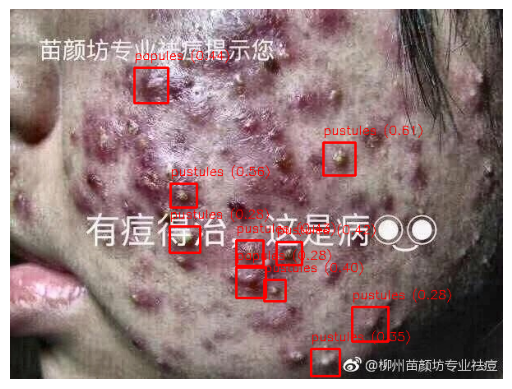

In [6]:

img = r"C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\levle3_20_jpg.rf.e034d581f236adc5fa89ce0fbe2fc2f7.jpg"
draw_predictions(model, img)


image 1/1 C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\01F3MMY3WTPR3X8P7DH0N0VF44_jpeg.rf.6118ad3e5e6c0932b16648e47774685b.jpg: 512x640 2 noduless, 228.8ms
Speed: 1.7ms preprocess, 228.8ms inference, 15.3ms postprocess per image at shape (1, 3, 512, 640)
Model Input Shape: 294x222
Displayed Image Shape: 294x222


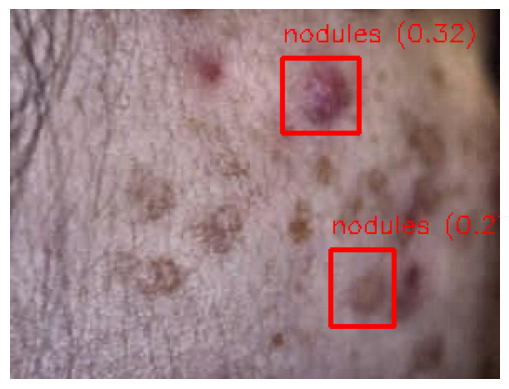

In [7]:

img = r"C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\01F3MMY3WTPR3X8P7DH0N0VF44_jpeg.rf.6118ad3e5e6c0932b16648e47774685b.jpg"
draw_predictions(model, img)


image 1/1 c:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\01F3MMY5FZF8N8BX849Y22JCQW_jpeg.rf.87fee93e4f2586d9f3d5bce41886304a.jpg: 512x640 1 papules, 1 pustules, 225.8ms
Speed: 5.7ms preprocess, 225.8ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 640)
Model Input Shape: 294x222
Displayed Image Shape: 294x222


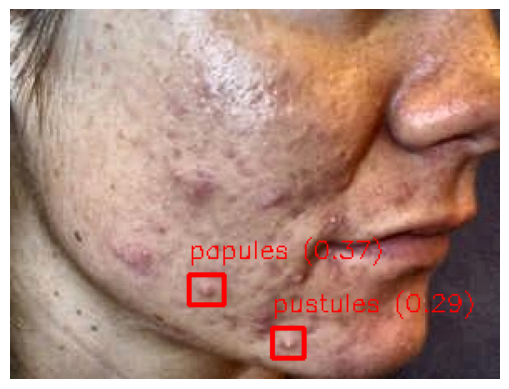

In [8]:
img = r"myvenv\Data3\test\images\01F3MMY5FZF8N8BX849Y22JCQW_jpeg.rf.87fee93e4f2586d9f3d5bce41886304a.jpg"
draw_predictions(model,img)


image 1/1 C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\28_jpg.rf.aaa241d449edb8d2def57af3c4e10fad.jpg: 640x480 (no detections), 221.6ms
Speed: 5.9ms preprocess, 221.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Model Input Shape: 194x259
Displayed Image Shape: 194x259
No Detections Found.


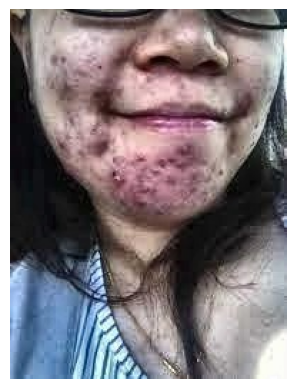

In [9]:
img = r"C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\28_jpg.rf.aaa241d449edb8d2def57af3c4e10fad.jpg"
draw_predictions(model , img)


image 1/1 C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\a9_jpg.rf.9da7ef1d9e9677bd7360b742b57bc408.jpg: 448x640 1 papules, 9 pustuless, 3 whiteheadss, 217.0ms
Speed: 0.0ms preprocess, 217.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Model Input Shape: 620x413
Displayed Image Shape: 620x413


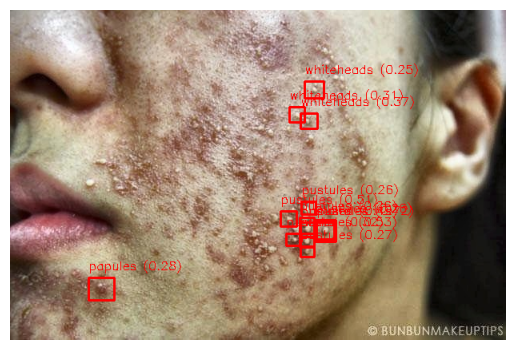

In [10]:
img = r"C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\a9_jpg.rf.9da7ef1d9e9677bd7360b742b57bc408.jpg"
draw_predictions(model, img)


image 1/1 C:\Users\Samiksha Bhatia\OneDrive\Desktop\img9.jpg: 640x320 3 papuless, 146.1ms
Speed: 9.4ms preprocess, 146.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 320)
Model Input Shape: 738x1600
Displayed Image Shape: 738x1600


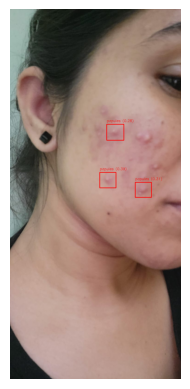

In [11]:
img = r"C:\Users\Samiksha Bhatia\OneDrive\Desktop\img9.jpg"
draw_predictions(model , img)


image 1/1 C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\levle2_83_jpg.rf.9eb055db7cec1b9530fbe3d68f4e5892.jpg: 640x576 4 papuless, 249.8ms
Speed: 8.8ms preprocess, 249.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 576)
Model Input Shape: 3112x3456
Displayed Image Shape: 3112x3456


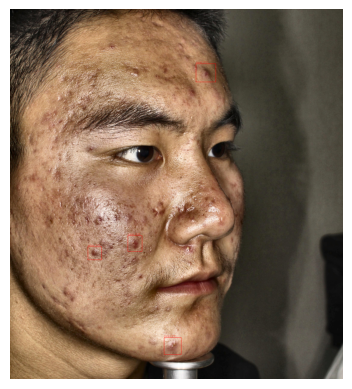

In [12]:
img = r"C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\levle2_83_jpg.rf.9eb055db7cec1b9530fbe3d68f4e5892.jpg"
draw_predictions(model , img)


image 1/1 C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\01F3MMY37WC5S8V9A3VD4X56PT_jpeg.rf.4111bfb93591b430b4acabee3e6c0519.jpg: 512x640 (no detections), 191.1ms
Speed: 6.5ms preprocess, 191.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)
Model Input Shape: 294x222
Displayed Image Shape: 294x222
No Detections Found.


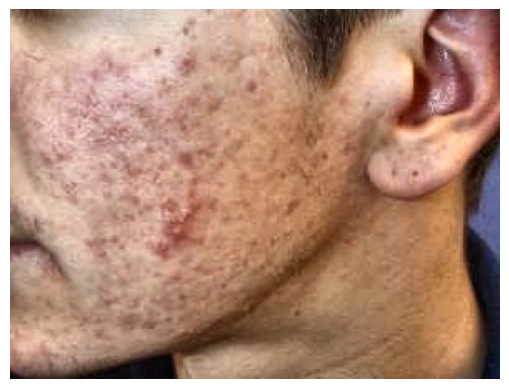

In [13]:
img = r"C:\Users\Samiksha Bhatia\Acne_gpu\myvenv\Data3\test\images\01F3MMY37WC5S8V9A3VD4X56PT_jpeg.rf.4111bfb93591b430b4acabee3e6c0519.jpg"
draw_predictions(model, img)